# KMeans on wine dataset

In [0]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


In [2]:
# Numerical libraries
import numpy as np   

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
# reading the CSV file into pandas dataframe
wine_data = pd.read_csv("winequality-red.csv") 

In [13]:
# Check top few records to get a feel of the data structure
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine_data.describe().transpose()     

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [15]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##  Let us do a pair plot analysis to visually check number of likely clusters

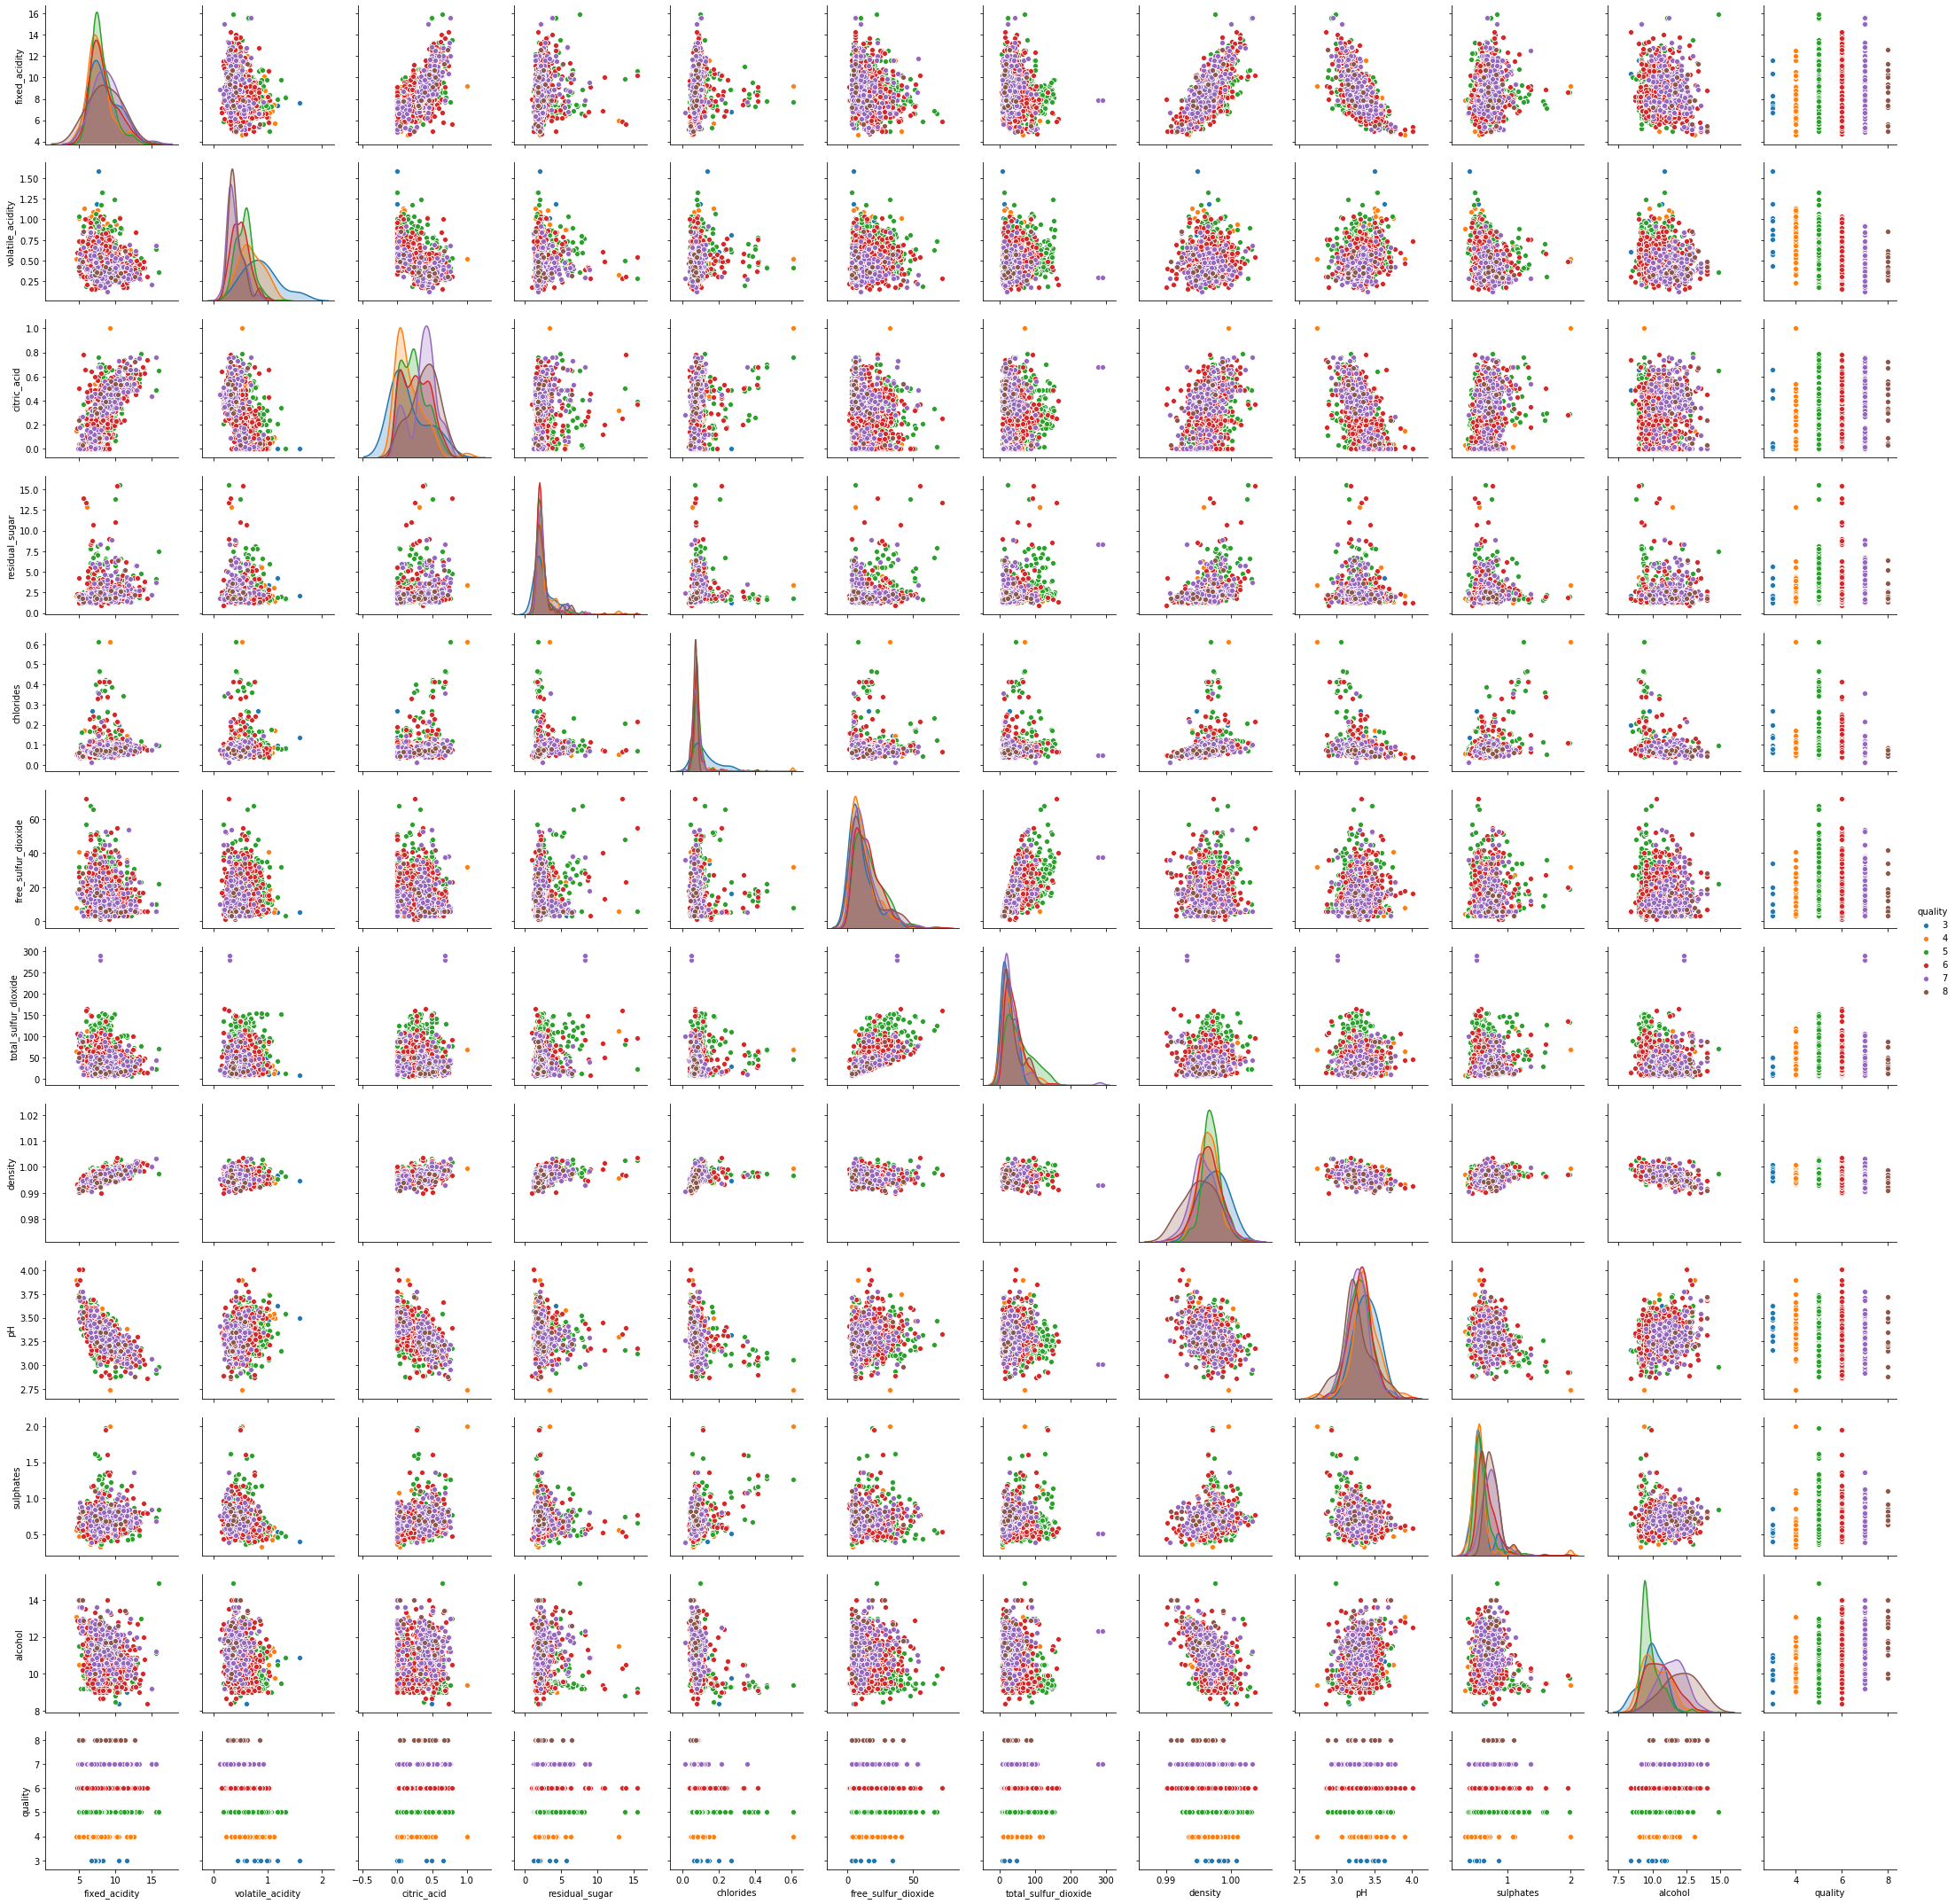

In [16]:
sns.pairplot(wine_data, diag_kind='kde', hue='quality')   # to plot density curve instead of histogram

In [18]:
from scipy.stats import zscore

wine_data_z = wine_data.apply(zscore)

# KMeans Clustering

*** Every cluster is associated with three properties ***
*  1 Cluster centeroids*
*  2 cluster labels*
*  3 Cluster intertia*

In [19]:
cluster_range = range( 2, 10) # expect 3 - 4 clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(wine_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(wine_data_z, labels, metric='euclidean'))

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,15779.428705,0.209438
1,3,14035.557295,0.173011
2,4,12669.477769,0.189567
3,5,11357.130664,0.180921
4,6,10566.830602,0.180389
5,7,9816.821825,0.176437
6,8,9448.869585,0.141985
7,9,9078.785935,0.145562


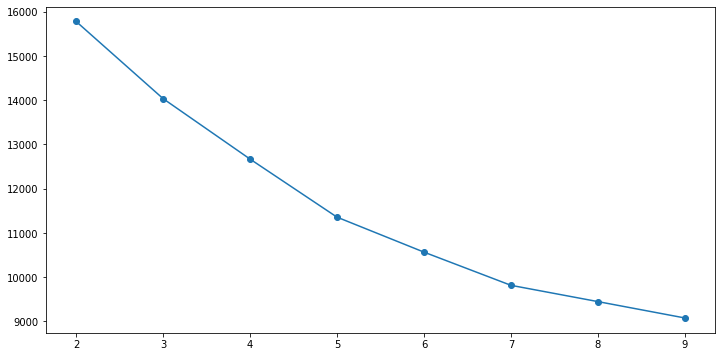

In [20]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [21]:
# The elbow plot shows that 7 might be a good choice for K and it seems logical given we know there are 7 qualities of wine

In [22]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(wine_data_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

# Every cluster gets associated with a lable, centroid and intertia....

In [23]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[-0.57425406, -0.49523509, -0.09889911, -0.20857446, -0.38864701,
         0.16884671, -0.21503223, -1.12492672,  0.50978768,  0.18813807,
         1.21027203,  0.85030143],
       [-0.04460845,  0.06103623,  0.11258431,  0.46781684,  0.03477486,
         1.07603419,  1.35022803,  0.41781283, -0.16909678, -0.18055625,
        -0.62353398, -0.46599271],
       [-0.47756334,  0.67622947, -0.77883655, -0.228171  , -0.07973858,
        -0.40047833, -0.36818329, -0.09135605,  0.40117816, -0.42341621,
        -0.42902887, -0.46987501],
       [ 1.29207669, -0.62920939,  1.17368509,  0.11830548,  0.44603131,
        -0.51102754, -0.45445463,  0.79452555, -0.92519823,  0.63336028,
         0.10298915,  0.35350023]])

In [24]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(wine_data_z) )
centroid_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.574254,-0.495235,-0.098899,-0.208574,-0.388647,0.168847,-0.215032,-1.124927,0.509788,0.188138,1.210272,0.850301
1,-0.044608,0.061036,0.112584,0.467817,0.034775,1.076034,1.350228,0.417813,-0.169097,-0.180556,-0.623534,-0.465993
2,-0.477563,0.676229,-0.778837,-0.228171,-0.079739,-0.400478,-0.368183,-0.091356,0.401178,-0.423416,-0.429029,-0.469875
3,1.292077,-0.629209,1.173685,0.118305,0.446031,-0.511028,-0.454455,0.794526,-0.925198,0.633360,0.102989,0.353500


In [25]:
prediction=cluster.predict(wine_data_z)
wine_data_z["GROUP"] = prediction

In [26]:
# Cound the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case

wine_data_z.groupby("GROUP").count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
GROUP,,,,,,,,,,,,
0,338,338,338,338,338,338,338,338,338,338,338,338
1,331,331,331,331,331,331,331,331,331,331,331,331
2,561,561,561,561,561,561,561,561,561,561,561,561
3,369,369,369,369,369,369,369,369,369,369,369,369


# Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
# centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002140CFC8>,
      dtype=object)

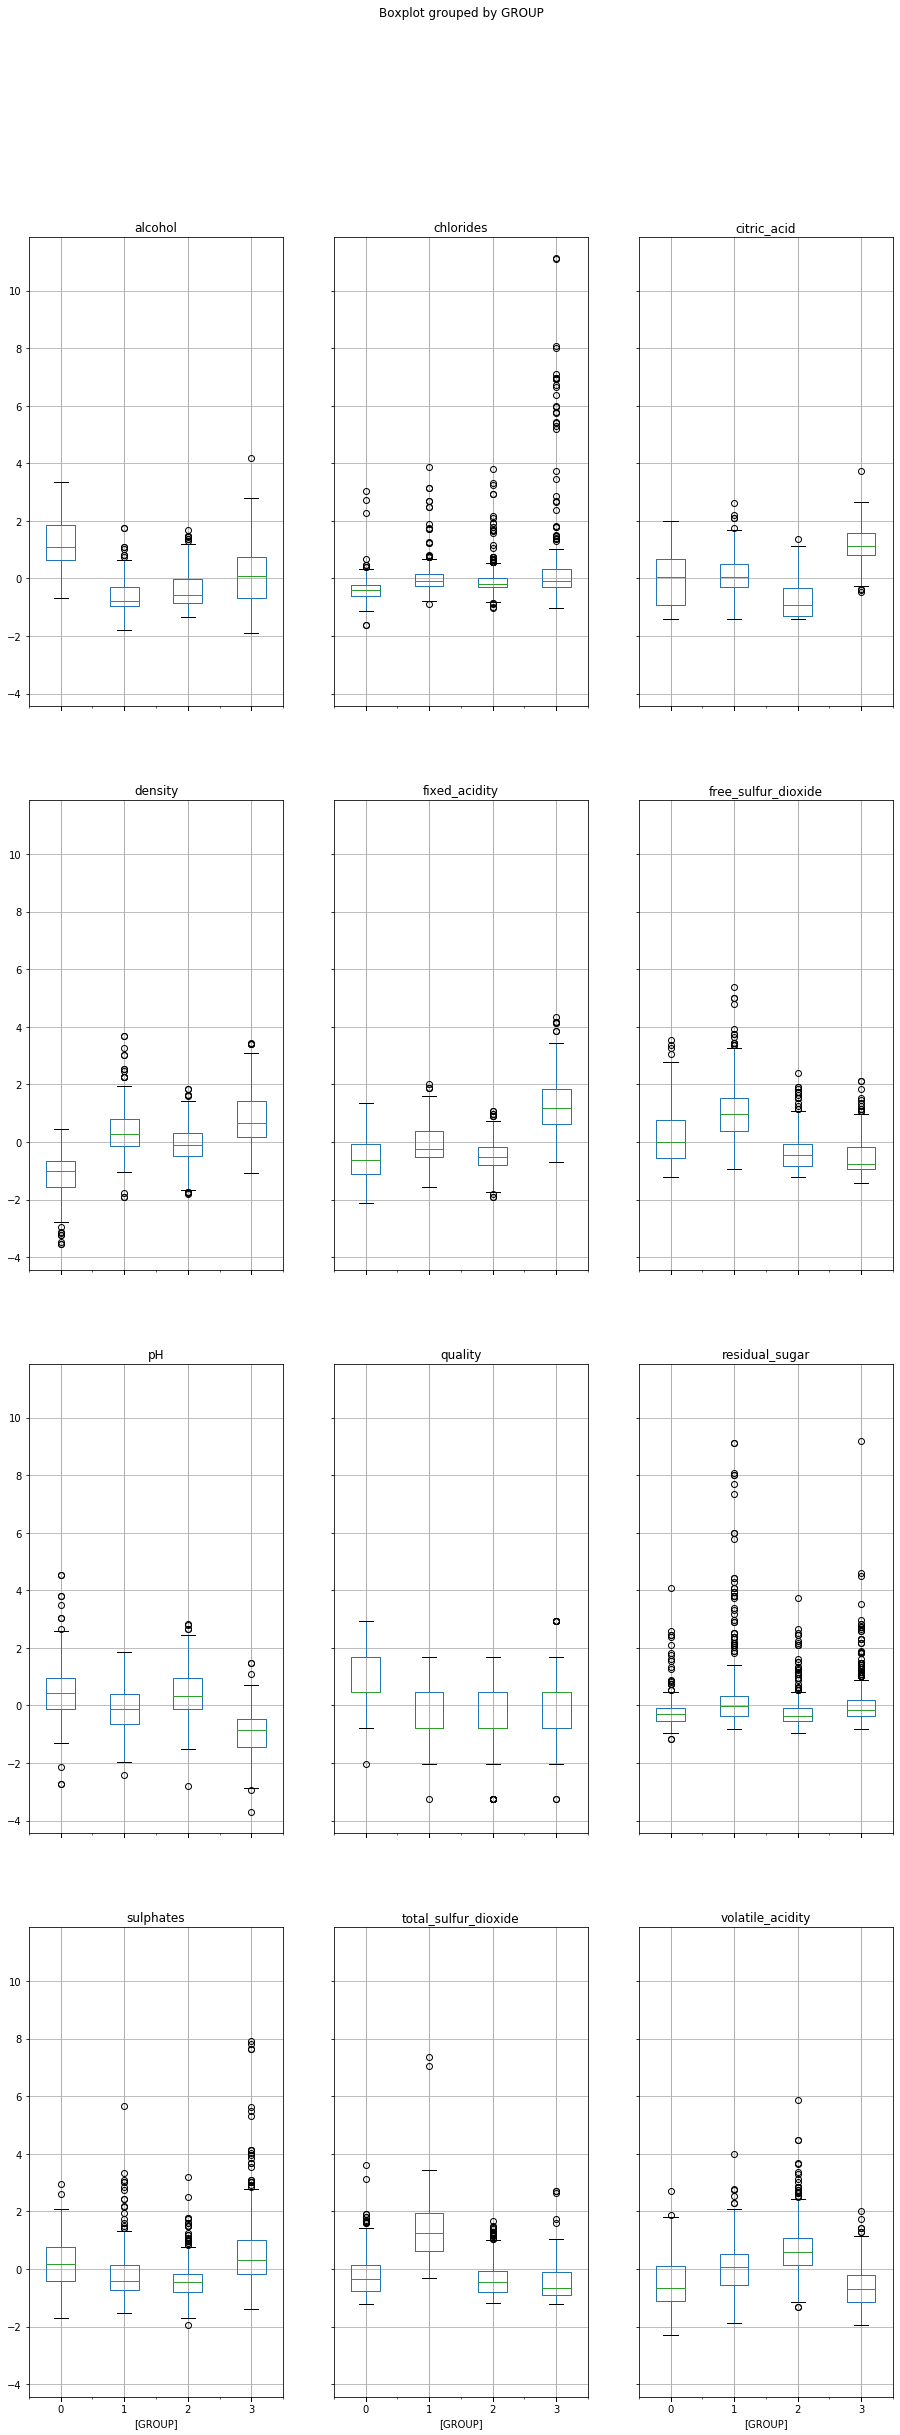

In [28]:
import matplotlib.pylab as plt

wine_data_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

In [29]:
wg=wine_data.groupby('quality')
wg=wine_data.get_group(3)

AttributeError: 'DataFrame' object has no attribute 'get_group'

In [30]:
wine_data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
